In [43]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib as plt

In [2]:
url = 'https://stats.nba.com/stats/playerprofilev2?LeagueID=&PerMode=Totals&PlayerID=201566'
headers = {'user-agent': 'Mozilla/5.0 (Windows 10; Win64; x64) Chrome/38.0.2114.2 Safari/537.36'}

In [3]:
test = requests.get(url, headers= headers)

In [63]:
test.status_code

200

In [12]:
a = test.json()

In [13]:
b = a['resultSets'].copy()

In [14]:
c = b[0].copy()

In [15]:
test98 = c['headers']

In [19]:
test98

['PLAYER_ID',
 'SEASON_ID',
 'LEAGUE_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'PLAYER_AGE',
 'GP',
 'GS',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [64]:
df99 = pd.DataFrame.from_dict(c['rowSet'])

In [65]:
df99.columns = test98

In [66]:
df99

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201566,2008-09,00,1610612760,OKC,20.0,82,65,2668,436,...,0.815,178,221,399,435,110,16,274,191,1256
1,201566,2009-10,00,1610612760,OKC,21.0,82,82,2813,485,...,0.780,143,258,401,652,108,34,268,204,1322
2,201566,2010-11,00,1610612760,OKC,22.0,82,82,2847,614,...,0.842,121,258,379,670,155,30,316,207,1793
3,201566,2011-12,00,1610612760,OKC,23.0,66,66,2331,578,...,0.823,96,205,301,362,112,21,239,147,1558
4,201566,2012-13,00,1610612760,OKC,24.0,82,82,2861,673,...,0.800,111,317,428,607,145,24,273,189,1903
5,201566,2013-14,00,1610612760,OKC,25.0,46,46,1412,346,...,0.826,55,208,263,319,88,7,177,104,1002
6,201566,2014-15,00,1610612760,OKC,26.0,67,67,2302,627,...,0.835,124,364,488,574,140,14,293,184,1886
7,201566,2015-16,00,1610612760,OKC,27.0,80,80,2750,656,...,0.812,145,481,626,834,163,20,342,200,1878
8,201566,2016-17,00,1610612760,OKC,28.0,81,81,2802,824,...,0.845,137,727,864,840,132,31,438,190,2558
9,201566,2017-18,00,1610612760,OKC,29.0,80,80,2914,757,...,0.737,152,652,804,820,147,20,381,200,2028


In [67]:
url = 'https://api.sportradar.us/nba/trial/v7/en/players/74a45eed-f2b0-4886-ae71-d04cf7d59528/profile.json?api_key=9cn8jgzchymqy9b2qnw28vhh'
russ1= requests.get(url)

In [68]:
russ2 = russ1.json()
russ3 = russ2['seasons'].copy()
dfruss1 =pd.DataFrame()

In [69]:
for i in range(len(russ3)):
    russ4 = russ3[i]['teams']
    dfruss1 = dfruss1.append(russ4[0]['average'], ignore_index=True)

In [70]:
rename_list = dfruss1.keys()
dic_rename = {}

for i in range(len(rename_list)):
    var_a = rename_list[i] + '_pG'
    dic_rename.update({rename_list[i]:var_a})

In [71]:
dfruss1.rename(dic_rename, axis=1, inplace=True)

In [72]:
dfruss1

,assists_pG,blocked_att_pG,blocks_pG,def_rebounds_pG,efficiency_pG,fast_break_att_pG,fast_break_made_pG,fast_break_pts_pG,field_goals_att_pG,field_goals_made_pG,...,second_chance_att_pG,second_chance_made_pG,second_chance_pts_pG,steals_pG,three_points_att_pG,three_points_made_pG,true_shooting_att_pG,turnovers_pG,two_points_att_pG,two_points_made_pG
0,8.7,0.71,0.57,7.71,25.86,2.57,1.86,4.43,17.14,7.86,...,1.86,1.14,2.86,1.86,4.43,1.14,19.85,4.00,12.71,6.71
1,10.7,0.93,0.45,9.56,29.01,3.71,2.08,5.16,20.18,8.63,...,2.38,1.01,2.71,1.95,5.63,1.63,22.90,4.45,14.55,7.00
2,10.3,1.05,0.25,8.15,29.49,3.94,2.33,5.50,21.09,9.46,...,2.35,1.15,3.03,1.84,4.08,1.21,24.20,4.76,17.01,8.25
3,10.4,1.12,0.38,8.98,33.83,0.00,0.00,0.00,23.96,10.17,...,0.00,0.00,0.11,1.63,7.20,2.47,28.53,5.41,16.77,7.70
4,10.4,1.05,0.25,6.01,28.54,0.00,0.00,0.00,18.05,8.20,...,0.00,0.00,0.06,2.04,4.26,1.26,21.20,4.28,13.79,6.94
5,8.6,1.31,0.21,5.43,27.72,0.00,0.00,0.00,21.96,9.36,...,0.00,0.00,0.15,2.09,4.30,1.28,26.25,4.37,17.66,8.07
6,6.9,0.85,0.15,4.52,21.87,0.00,0.00,0.00,17.20,7.52,...,0.00,0.00,0.24,1.91,4.65,1.48,20.00,3.85,12.54,6.04


In [73]:
dfrussnba = df99[::-1].copy()

In [76]:
dfrussnba.reset_index(drop=True, inplace=True)

In [80]:
dfruss_merged = dfruss1.merge(dfrussnba, left_index=True, right_index=True)

In [81]:
dfruss_merged

,assists_pG,blocked_att_pG,blocks_pG,def_rebounds_pG,efficiency_pG,fast_break_att_pG,fast_break_made_pG,fast_break_pts_pG,field_goals_att_pG,field_goals_made_pG,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,8.7,0.71,0.57,7.71,25.86,2.57,1.86,4.43,17.14,7.86,...,0.667,13,46,59,55,11,4,25,17,127
1,10.7,0.93,0.45,9.56,29.01,3.71,2.08,5.16,20.18,8.63,...,0.656,109,698,807,784,142,33,325,245,1675
2,10.3,1.05,0.25,8.15,29.49,3.94,2.33,5.50,21.09,9.46,...,0.737,152,652,804,820,147,20,381,200,2028
3,10.4,1.12,0.38,8.98,33.83,0.00,0.00,0.00,23.96,10.17,...,0.845,137,727,864,840,132,31,438,190,2558
4,10.4,1.05,0.25,6.01,28.54,0.00,0.00,0.00,18.05,8.20,...,0.812,145,481,626,834,163,20,342,200,1878
5,8.6,1.31,0.21,5.43,27.72,0.00,0.00,0.00,21.96,9.36,...,0.835,124,364,488,574,140,14,293,184,1886
6,6.9,0.85,0.15,4.52,21.87,0.00,0.00,0.00,17.20,7.52,...,0.826,55,208,263,319,88,7,177,104,1002


In [85]:
dfruss_merged.to_pickle('Westbrook.pkl')

In [82]:
dfruss_merged.keys()

Index(['assists_pG', 'blocked_att_pG', 'blocks_pG', 'def_rebounds_pG',
       'efficiency_pG', 'fast_break_att_pG', 'fast_break_made_pG',
       'fast_break_pts_pG', 'field_goals_att_pG', 'field_goals_made_pG',
       'flagrant_fouls_pG', 'fouls_drawn_pG', 'free_throws_att_pG',
       'free_throws_made_pG', 'minutes_pG', 'off_rebounds_pG',
       'offensive_fouls_pG', 'personal_fouls_pG', 'points_pG',
       'points_in_paint_pG', 'points_in_paint_att_pG',
       'points_in_paint_made_pG', 'points_off_turnovers_pG', 'rebounds_pG',
       'second_chance_att_pG', 'second_chance_made_pG', 'second_chance_pts_pG',
       'steals_pG', 'three_points_att_pG', 'three_points_made_pG',
       'true_shooting_att_pG', 'turnovers_pG', 'two_points_att_pG',
       'two_points_made_pG', 'PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB

In [94]:
dfruss_sub = dfruss_merged[['SEASON_ID', 'points_pG', 'assists_pG','rebounds_pG','turnovers_pG','free_throws_att_pG' ]]

In [95]:
dfruss_sub

,SEASON_ID,points_pG,assists_pG,rebounds_pG,turnovers_pG,free_throws_att_pG
0,2019-20,20.7,8.7,9.57,4.00,6.14
1,2018-19,22.9,10.7,11.05,4.45,6.18
2,2017-18,25.4,10.3,10.05,4.76,7.08
3,2016-17,31.6,10.4,10.67,5.41,10.37
4,2015-16,23.5,10.4,7.83,4.28,7.16
5,2014-15,28.1,8.6,7.28,4.37,9.76
6,2013-14,21.8,6.9,5.72,3.85,6.37


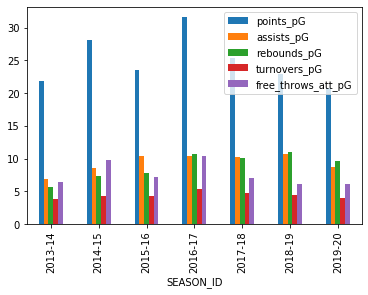

In [96]:
dfruss_sub[::-1].plot(x='SEASON_ID', y =['points_pG', 'assists_pG','rebounds_pG', 'turnovers_pG','free_throws_att_pG'], kind='bar');

In [97]:
dfruss_sub2 = dfruss_merged[['SEASON_ID', 'FG_PCT', 'FG3_PCT','FT_PCT' ]]

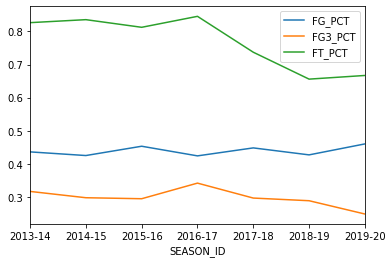

In [100]:
dfruss_sub2[::-1].plot(x='SEASON_ID', y =[ 'FG_PCT', 'FG3_PCT','FT_PCT']);

In [20]:
df99.drop(['PLAYER_ID','LEAGUE_ID','TEAM_ID','PLAYER_AGE' ],axis=1 , inplace=True)

In [21]:
df99

,SEASON_ID,TEAM_ABBREVIATION,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2008-09,OKC,82,65,2668,436,1095,0.398,35,129,...,0.815,178,221,399,435,110,16,274,191,1256
1,2009-10,OKC,82,82,2813,485,1160,0.418,23,104,...,0.780,143,258,401,652,108,34,268,204,1322
2,2010-11,OKC,82,82,2847,614,1390,0.442,34,103,...,0.842,121,258,379,670,155,30,316,207,1793
3,2011-12,OKC,66,66,2331,578,1266,0.457,62,196,...,0.823,96,205,301,362,112,21,239,147,1558
4,2012-13,OKC,82,82,2861,673,1535,0.438,97,300,...,0.800,111,317,428,607,145,24,273,189,1903
5,2013-14,OKC,46,46,1412,346,791,0.437,68,214,...,0.826,55,208,263,319,88,7,177,104,1002
6,2014-15,OKC,67,67,2302,627,1471,0.426,86,288,...,0.835,124,364,488,574,140,14,293,184,1886
7,2015-16,OKC,80,80,2750,656,1444,0.454,101,341,...,0.812,145,481,626,834,163,20,342,200,1878
8,2016-17,OKC,81,81,2802,824,1941,0.425,200,583,...,0.845,137,727,864,840,132,31,438,190,2558
9,2017-18,OKC,80,80,2914,757,1687,0.449,97,326,...,0.737,152,652,804,820,147,20,381,200,2028


In [23]:
df99.rename(columns = {'TEAM_ABBREVIATION': 'TEAM'}, inplace=True)

In [24]:
df99

,SEASON_ID,TEAM,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2008-09,OKC,82,65,2668,436,1095,0.398,35,129,...,0.815,178,221,399,435,110,16,274,191,1256
1,2009-10,OKC,82,82,2813,485,1160,0.418,23,104,...,0.780,143,258,401,652,108,34,268,204,1322
2,2010-11,OKC,82,82,2847,614,1390,0.442,34,103,...,0.842,121,258,379,670,155,30,316,207,1793
3,2011-12,OKC,66,66,2331,578,1266,0.457,62,196,...,0.823,96,205,301,362,112,21,239,147,1558
4,2012-13,OKC,82,82,2861,673,1535,0.438,97,300,...,0.800,111,317,428,607,145,24,273,189,1903
5,2013-14,OKC,46,46,1412,346,791,0.437,68,214,...,0.826,55,208,263,319,88,7,177,104,1002
6,2014-15,OKC,67,67,2302,627,1471,0.426,86,288,...,0.835,124,364,488,574,140,14,293,184,1886
7,2015-16,OKC,80,80,2750,656,1444,0.454,101,341,...,0.812,145,481,626,834,163,20,342,200,1878
8,2016-17,OKC,81,81,2802,824,1941,0.425,200,583,...,0.845,137,727,864,840,132,31,438,190,2558
9,2017-18,OKC,80,80,2914,757,1687,0.449,97,326,...,0.737,152,652,804,820,147,20,381,200,2028


In [52]:
df99.set_index('SEASON_ID', inplace=True)

In [55]:
df99

,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
SEASON_ID,,,,,,,,,,,,,,,,,,,
2008-09,OKC,82,2668,436,1095,0.398,35,129,0.271,349,428,0.815,399,435,110,16,274,191,1256
2009-10,OKC,82,2813,485,1160,0.418,23,104,0.221,329,422,0.780,401,652,108,34,268,204,1322
2010-11,OKC,82,2847,614,1390,0.442,34,103,0.330,531,631,0.842,379,670,155,30,316,207,1793
2011-12,OKC,66,2331,578,1266,0.457,62,196,0.316,340,413,0.823,301,362,112,21,239,147,1558
2012-13,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,428,607,145,24,273,189,1903
2013-14,OKC,46,1412,346,791,0.437,68,214,0.318,242,293,0.826,263,319,88,7,177,104,1002
2014-15,OKC,67,2302,627,1471,0.426,86,288,0.299,546,654,0.835,488,574,140,14,293,184,1886
2015-16,OKC,80,2750,656,1444,0.454,101,341,0.296,465,573,0.812,626,834,163,20,342,200,1878
2016-17,OKC,81,2802,824,1941,0.425,200,583,0.343,710,840,0.845,864,840,132,31,438,190,2558


In [29]:
df99.drop(['GS','OREB','DREB'],axis=1 , inplace=True)

KeyError: "['GS' 'OREB' 'DREB'] not found in axis"

In [56]:
df99

,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
SEASON_ID,,,,,,,,,,,,,,,,,,,
2008-09,OKC,82,2668,436,1095,0.398,35,129,0.271,349,428,0.815,399,435,110,16,274,191,1256
2009-10,OKC,82,2813,485,1160,0.418,23,104,0.221,329,422,0.780,401,652,108,34,268,204,1322
2010-11,OKC,82,2847,614,1390,0.442,34,103,0.330,531,631,0.842,379,670,155,30,316,207,1793
2011-12,OKC,66,2331,578,1266,0.457,62,196,0.316,340,413,0.823,301,362,112,21,239,147,1558
2012-13,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,428,607,145,24,273,189,1903
2013-14,OKC,46,1412,346,791,0.437,68,214,0.318,242,293,0.826,263,319,88,7,177,104,1002
2014-15,OKC,67,2302,627,1471,0.426,86,288,0.299,546,654,0.835,488,574,140,14,293,184,1886
2015-16,OKC,80,2750,656,1444,0.454,101,341,0.296,465,573,0.812,626,834,163,20,342,200,1878
2016-17,OKC,81,2802,824,1941,0.425,200,583,0.343,710,840,0.845,864,840,132,31,438,190,2558


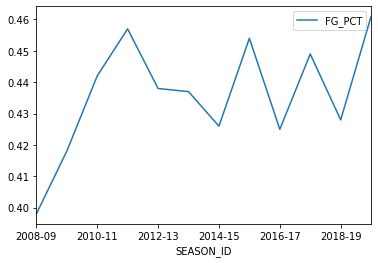

In [38]:
df99.reset_index().plot(x= 'SEASON_ID', y = 'FG_PCT');

In [58]:
df99.reset_index(inplace=True)

In [59]:
df99

,SEASON_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
0,2008-09,OKC,82,2668,436,1095,0.398,35,129,0.271,349,428,0.815,399,435,110,16,274,191,1256
1,2009-10,OKC,82,2813,485,1160,0.418,23,104,0.221,329,422,0.780,401,652,108,34,268,204,1322
2,2010-11,OKC,82,2847,614,1390,0.442,34,103,0.330,531,631,0.842,379,670,155,30,316,207,1793
3,2011-12,OKC,66,2331,578,1266,0.457,62,196,0.316,340,413,0.823,301,362,112,21,239,147,1558
4,2012-13,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,428,607,145,24,273,189,1903
5,2013-14,OKC,46,1412,346,791,0.437,68,214,0.318,242,293,0.826,263,319,88,7,177,104,1002
6,2014-15,OKC,67,2302,627,1471,0.426,86,288,0.299,546,654,0.835,488,574,140,14,293,184,1886
7,2015-16,OKC,80,2750,656,1444,0.454,101,341,0.296,465,573,0.812,626,834,163,20,342,200,1878
8,2016-17,OKC,81,2802,824,1941,0.425,200,583,0.343,710,840,0.845,864,840,132,31,438,190,2558
9,2017-18,OKC,80,2914,757,1687,0.449,97,326,0.298,417,566,0.737,804,820,147,20,381,200,2028


In [62]:
df99[::-1]

,SEASON_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
11,2019-20,HOU,6,199,47,102,0.461,7,28,0.250,26,39,0.667,59,55,11,4,25,17,127
10,2018-19,OKC,73,2629,630,1473,0.428,119,411,0.290,296,451,0.656,807,784,142,33,325,245,1675
9,2017-18,OKC,80,2914,757,1687,0.449,97,326,0.298,417,566,0.737,804,820,147,20,381,200,2028
8,2016-17,OKC,81,2802,824,1941,0.425,200,583,0.343,710,840,0.845,864,840,132,31,438,190,2558
7,2015-16,OKC,80,2750,656,1444,0.454,101,341,0.296,465,573,0.812,626,834,163,20,342,200,1878
6,2014-15,OKC,67,2302,627,1471,0.426,86,288,0.299,546,654,0.835,488,574,140,14,293,184,1886
5,2013-14,OKC,46,1412,346,791,0.437,68,214,0.318,242,293,0.826,263,319,88,7,177,104,1002
4,2012-13,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,428,607,145,24,273,189,1903
3,2011-12,OKC,66,2331,578,1266,0.457,62,196,0.316,340,413,0.823,301,362,112,21,239,147,1558
2,2010-11,OKC,82,2847,614,1390,0.442,34,103,0.330,531,631,0.842,379,670,155,30,316,207,1793


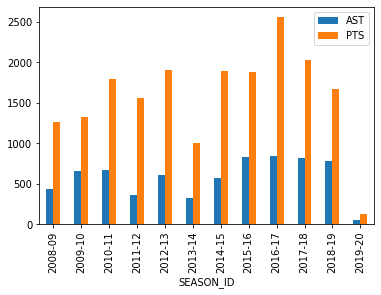

In [51]:
df99.plot(x='SEASON_ID', y =['AST', 'PTS'], kind='bar');
